# <center><font color = 'green'>Simulated data for purchasing a new electric car</fon></center>

![car-reg](Images/car-reg.png)<br><p style='text-align: right;'>(Dreamstime.com, 2019)</p>

## <center><font color = 'green'>Barry Clarke</fon></center>
## <center><font color = 'green'>Programming for Data Analytics - Project - Autumn 2019</fon></center>

## Description

This repository will simulate the data for the purchasing of new hybrid and full electric cars in Ireland in the 2019. Summary car sales figures show that there has been a significant increase in Hybrid and full electric cars in 2019, when compared to 2018 sales figures (Irish Motor Industry, 2019). The trend of total sales of Hybrids & full electric cars for 2018 and 2019 can be seen below. <br> 
![New E-car sales summary](Images/E-Car-sales-summary.PNG)<br>
This data is of interest to the author, as his next car purchase will either be a hybrid or a full electric. Note the trend in the above plot with two peaks, one in January and one in July. This can be explained by the volume of car sales seen at the beginning of the 1st half of the year, and the beginning of the 2nd half of the year. This trend will be simulated in the Month column in the dataset below.

The dataset will include the following columns:
1. **Model:** The make of car
2. **Make:** The manufacturer of the car 
3. **Classification:** The class of car 
4. **Technology** The engine type
5. **Price** The price of the car
6. **Range** The range/distance that can be travelled when powered on battery
7. **Month** The Month the car was registered
8. **Location** County where the car is registered. <font color = 'Red'>Note:</font> The dataset will only focus on Dublin and the commuter counties, as the author is a commuter and would like data relevant to his life situation
9. **Colour** The colour of the car

Within the dataset, the relationships between the variables will be discussed and simulated. The final simulated dataset will contain 1000 entries.<br>
**Note:** The simulated dataset is primarily based on summary data provided from the Irish Motor Industry Motorstats (Irish Motor Industry, 2019)

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The below data is based on the summary data for the registrations of hybrid and Electric passenger cars sold in Dublin and it's commuter counties in 2019 to end of November. This summary data can be viewed [here](Data/passenger-cars-by-model.xlsx)<br>

Prior to structuring and filling the dataset, it is necessary to list all possible options within each variable.

In [2]:
# List of options within each variable
model = ['Leaf', 'Kona', 'Niro', 'Zoe', 'E-Golf', 'Outlander', 'RR Sport RA', 'Ioniq', 'I3', '5 Series', 'XC90', 
        '3 Series', 'Soul', 'Countryman', 'Model S', 'XC60', 'E-Tron', 'I-Pace', 'RR', 'Model 3', 'Model X',
       'S90', 'Prius', 'Panamera', 'Mondeo', '2 Series', 'RR Evoque R', 'EQC', 'E-Class', 'Evalia', '7 Series',
       'Passat', 'Twizy', 'C-Class', 'A7', 'V90', 'Cayenne']
location = ['Dublin', 'Meath', 'Louth', 'Kildare', 'Wicklow', 'Wexford', 'Carlow']
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colour = ['Grey', 'White', 'Black', 'Blue','Red', 'Other']

In addtion to above, the following options will be available within the respective variables. These variables do not need to be declared in a code cell, as they will be directly linked to each model, however it may be of value to identify them at this time. <br>
make = [<font color = 'red'>'Nissan', 'Hyundai', 'Kia', 'Renault', 'Volkswagon', 'Mitsubishi', 'Land Rover', 'BMW', 'Volvo', 'Mini', 'Tesla', 'Audi', 'Jaguar', 'Toyota', 'Porsche', 'Ford', 'Mercedez-Benz'</font>]<br>
technology = [<font color = 'red'>'Hybrid', 'Electric'</font>]<br>
classification = [<font color = 'red'>'Small', 'Medium', 'Large', 'SUV'</font>]<br>

## 1. Initiate dataset with a Model column

The principal variable of the dataset will be the Model of car registered. For each sale simulated, the [numpy.random.choice()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html) (numpy.random.choice, 2019) function will be used, with a probability attached to each car based on the sales statistics of all cars in the data. The numpy.random.choice function is used to generate a random sample for a 1D array. So, given an array from any of the above listed variables for this dataset, the numpy.random.choice function will randomly select any element from that array. Futhermore, assigning a probability to each element will bias the random generation to produce a non-uniform distribution. For this dataset, a non uniform distribution is required, as not all cars in the dataset have the same popularity.

In [3]:
# Probabilities of each car model being registered, based on 2019 Summary data (Irish Motor Industry, 2019)
p1=[0.212, 0.220, 0.090, 0.037, 0.062, 0.046, 0.046, 0.003, 0.035, 0.027, 0.022, 0.02, 0.012, 0.013, 0.014, 0.01, 0.011, 0.012, 0.010, 0.009, 0.008, 0.009, 0.005, 0.006, 0.002, 0.002, 0.002, 0.001, 0.001, 0.0003, 0.0007, 0.0007, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003]
# numpy.random.choice() can have difficulty suming all probabilities to 1. The solution is to normalize the probabilities 
# by dividing them by their sum if the sum is close enough to 1. (stackoverflow.com, 2017)
p1 = np.array(p1)
p1 /= p1.sum()

In [4]:
# Create a dataset containing 1000 hybrid or electric cars listed in 'Model' above with probabilities 'P1' also listed above
Cars = pd.DataFrame({'Model': np.random.choice(model, 1000, p=p1)})
# View the first 10 rows of the dataset
Cars.head(10)

,Model
0,E-Golf
1,RR Sport RA
2,Niro
3,S90
4,Leaf
5,Leaf
6,I3
7,Model X
8,Leaf
9,Niro


Due to the probabilities assigned to each model, the distribution will be non uniform. Please see the plot below which provides the number of cars simulated for registeration in 2019.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

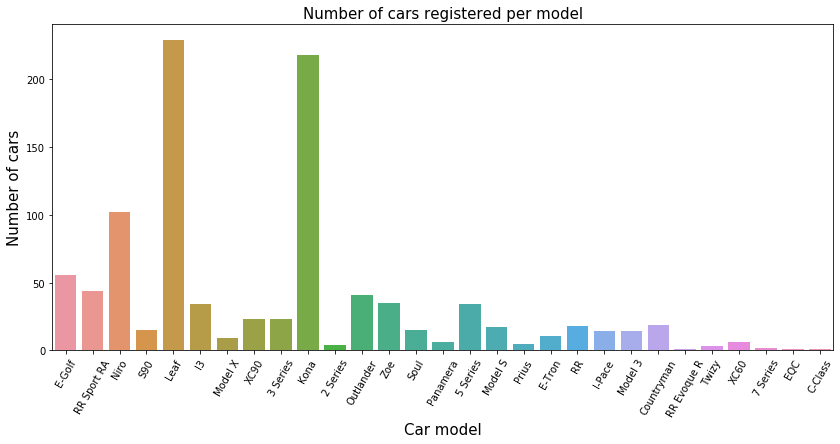

In [5]:
# Adjust the output plot sizes to be full page width (stackoverflow, 2015)
plt.rcParams['figure.figsize'] = (14,6)
# Plot the results of the simulation using the seaborn countplot function (Pydata, 2019)
sns.countplot(x='Model', data=Cars)
# Add a title and label axes
plt.title('Number of cars registered per model', size = 15)
plt.xlabel('Car model', size = 15)
plt.ylabel('Number of cars', size = 15)
# Rotate the x axis text (stackoverflow, 2019)
plt.xticks(rotation=60)

**Note** how the "Kona" and the "Leaf" will have the highest number of cars, in line with the statistics provided in [actual cars by model](Data/passenger-cars-by-model.xlsx) and below.<br>
![Cars by model](Images/Cars-by-model.PNG)

## 2. Append dataset with Make, Classification, Technology, Price and Range columns

For each model chosen in the dataset, the model's manufacturer, model classification, and car engine technology are directly related to the model ie. they do not change in relation to the model. However, the model is randomly chosen above, so the manufacturer, classification and technology will vary across the dataset and are significant variables for which the author would like to compare and contrast in the dataset.

For each car model, there is a price estimate based on the market value obtained by an online research of all listed models. This research involved visiting all 17 car manufacturers websites, as well as various car sales wbesites. All these websites are listed in the reference section at the end of this notebook.<br> In simulating the price for each randomly chosen model, a normal distribution around the price estimate is used to reflect the price variance from dealer to dealer. The [numpy.random.normal()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html) function is used to simulate the normal distribution around the mean price for each model of car. As an illustration, below plots the normal distribution of price for 200 Nissan Leafs sold. The researched price of a Nissan Leaf is €38,000. Applying a Standard Deviation of 1000 to this price, the normal distribution of prices around €38,000 is plotted below. This is seen as an accurate estimate of price variance from car dealer to car dealer.

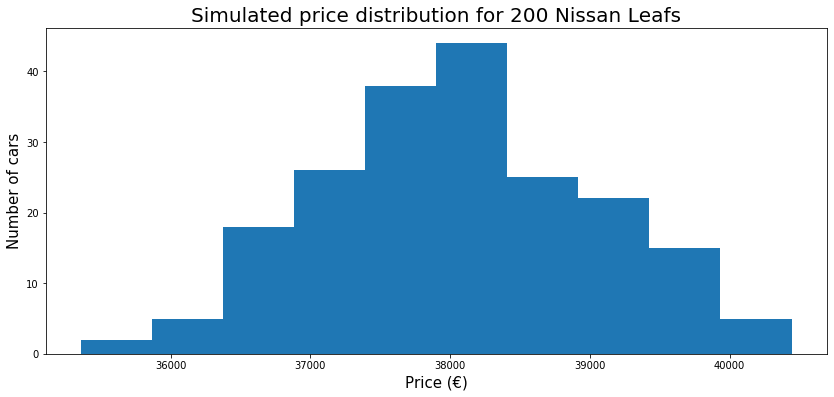

In [6]:
# Produce 1000 random samples using the randn function
leaf = np.random.normal(38000, 1000, 200)
# Plot the results of each, by histogram, side by side for comparison
plt.hist(leaf)
plt.title('Simulated price distribution for 200 Nissan Leafs', size=20)
plt.xlabel('Price (€)', size=15)
plt.ylabel('Number of cars', size=15)

plt.show()

**Note:** For the purpose of this exercise, the same normal distribution was applied to all car models. Further research could be done to obtain more accurate variance on individual car models. 

In [7]:
# For each model, assign the correct make, classification, technology, and range. Also use the numpy.randon.normal()
# function to give an accurate estimate of the price paid. Use a for lopp for the dataset size of 1000
for i in range(1000):
    # Use an if loop to assign correct categories and price estimate for each car model
    if Cars.loc[i, 'Model'] == 'Leaf': # If Leaf is randomly selected above
        Cars.loc[i, 'Make'] = 'Nissan' # Manufacturer must be Nissan
        Cars.loc[i, 'Classification'] = 'Small' # Classification must be Small
        Cars.loc[i, 'Technology'] = 'Electric'# Technology must be Electric
        # Use the numpy.random.normal() function to estimate the price of the car
        # np.random.normal(x, y, z): x = mean price, y = Std Dev of the price distribution across dealerships, 
        # z = no. of output values
        leaf = np.random.normal(38000, 1000, 1)
        # roundup the float to the nearest integer
        Cars.loc[i, 'Price (€)'] = np.round(leaf)
        Cars.loc[i, 'Range (km)'] = '385' # Range must be 385km
    # Repeat the loop for every car model in the available for the dataset
    elif Cars.loc[i, 'Model'] == 'Kona':
        Cars.loc[i, 'Make'] = 'Hyundai'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        kona = np.random.normal(38630, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(kona)
        Cars.loc[i, 'Range (km)'] = '449'
    elif Cars.loc[i, 'Model'] == 'Niro':
        Cars.loc[i, 'Make'] = 'Kia'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        niro = np.random.normal(37495, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(niro)
        Cars.loc[i, 'Range (km)'] = '455'
    elif Cars.loc[i, 'Model'] == 'E-Golf':
        Cars.loc[i, 'Make'] = 'Volkswagen'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Electric'
        egolf = np.random.normal(42874, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(egolf)
        Cars.loc[i, 'Range (km)'] = '304'
    elif Cars.loc[i, 'Model'] == 'RR Sport RA':
        Cars.loc[i, 'Make'] = 'Land Rover'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        RRsport = np.random.normal(95000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(RRsport)
        Cars.loc[i, 'Range (km)'] = '40'
    elif Cars.loc[i, 'Model'] == 'Outlander':
        Cars.loc[i, 'Make'] = 'Mitsubishi'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        outlander = np.random.normal(45000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(outlander)
        Cars.loc[i, 'Range (km)'] = '48'
    elif Cars.loc[i, 'Model'] == 'Model 3':
        Cars.loc[i, 'Make'] = 'Tesla'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Electric'
        model3 = np.random.normal(45000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(model3)
        Cars.loc[i, 'Range (km)'] = '530'
    elif Cars.loc[i, 'Model'] == 'Zoe':
        Cars.loc[i, 'Make'] = 'Renault'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Electric'
        zoe = np.random.normal(25000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(zoe)
        Cars.loc[i, 'Range (km)'] = '240'
    elif Cars.loc[i, 'Model'] == 'I3':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Electric'
        i3 = np.random.normal(36000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(i3)
        Cars.loc[i, 'Range (km)'] = '260'
    elif Cars.loc[i, 'Model'] == 'Ioniq':
        Cars.loc[i, 'Make'] = 'Hyundai'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid or Electric'
        ioniq = np.random.normal(30000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(ioniq)
        Cars.loc[i, 'Range (km)'] = '312'
    elif Cars.loc[i, 'Model'] == '5 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series5 = np.random.normal(51000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(series5)
        Cars.loc[i, 'Range (km)'] = '48'
    elif Cars.loc[i, 'Model'] == 'XC90':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        xc90 = np.random.normal(75000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(xc90)
        Cars.loc[i, 'Range (km)'] = '40'
    elif Cars.loc[i, 'Model'] == '3 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series3 = np.random.normal(43000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(series3)
        Cars.loc[i, 'Range (km)'] = '64'
    elif Cars.loc[i, 'Model'] == 'Model S':
        Cars.loc[i, 'Make'] = 'Tesla'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Electric'
        models = np.random.normal(96000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(models)
        Cars.loc[i, 'Range (km)'] = '610'
    elif Cars.loc[i, 'Model'] == 'Countryman':
        Cars.loc[i, 'Make'] = 'Mini'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        countryman = np.random.normal(33000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(countryman)
        Cars.loc[i, 'Range (km)'] = '20'
    elif Cars.loc[i, 'Model'] == 'I-Pace':
        Cars.loc[i, 'Make'] = 'Jaguar'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        ipace = np.random.normal(81000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(ipace)
        Cars.loc[i, 'Range (km)'] = '480'
    elif Cars.loc[i, 'Model'] == 'E-Tron':
        Cars.loc[i, 'Make'] = 'Audi'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Electric'
        etron = np.random.normal(95000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(etron)
        Cars.loc[i, 'Range (km)'] = '400'
    elif Cars.loc[i, 'Model'] == 'XC60':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        xc60 = np.random.normal(65000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(xc60)
        Cars.loc[i, 'Range (km)'] = '32'
    elif Cars.loc[i, 'Model'] == 'Soul':
        Cars.loc[i, 'Make'] = 'Kia'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        soul = np.random.normal(36000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(soul)
        Cars.loc[i, 'Range (km)'] = '452'
    elif Cars.loc[i, 'Model'] == 'RR':
        Cars.loc[i, 'Make'] = 'Land Rover'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        RR = np.random.normal(132000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(RR)
        Cars.loc[i, 'Range (km)'] = '48'
    elif Cars.loc[i, 'Model'] == 'S90':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        S90 = np.random.normal(49000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(S90)
        Cars.loc[i, 'Range (km)'] = '40'
    elif Cars.loc[i, 'Model'] == 'Model X':
        Cars.loc[i, 'Make'] = 'Tesla'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        modelx = np.random.normal(101000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(modelx)
        Cars.loc[i, 'Range (km)'] = '507'
    elif Cars.loc[i, 'Model'] == 'Panamera':
        Cars.loc[i, 'Make'] = 'Porsche'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        panamera = np.random.normal(119000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(panamera)
        Cars.loc[i, 'Range (km)'] = '48'
    elif Cars.loc[i, 'Model'] == 'Prius':
        Cars.loc[i, 'Make'] = 'Toyota'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        prius = np.random.normal(33000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(prius)
        Cars.loc[i, 'Range (km)'] = '50'
    elif Cars.loc[i, 'Model'] == '2 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series2 = np.random.normal(52000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(series2)
        Cars.loc[i, 'Range (km)'] = '48'
    elif Cars.loc[i, 'Model'] == 'Mondeo':
        Cars.loc[i, 'Make'] = 'Ford'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        mondeo = np.random.normal(38000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(mondeo)
        Cars.loc[i, 'Range (km)'] = '40'
    elif Cars.loc[i, 'Model'] == 'RR Evoque R':
        Cars.loc[i, 'Make'] = 'Land Rover'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        RRevoque = np.random.normal(75000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(RRevoque)
        Cars.loc[i, 'Range (km)'] = '40'
    elif Cars.loc[i, 'Model'] == 'EQC':
        Cars.loc[i, 'Make'] = 'Mercedes Benz'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        eqc = np.random.normal(89000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(eqc)
        Cars.loc[i, 'Range (km)'] = '405'
    elif Cars.loc[i, 'Model'] == 'E-Class':
        Cars.loc[i, 'Make'] = 'Mercedes Benz'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        eclass = np.random.normal(90000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(eclass)
        Cars.loc[i, 'Range (km)'] = '48'
    elif Cars.loc[i, 'Model'] == 'Evalia':
        Cars.loc[i, 'Make'] = 'Nissan'
        Cars.loc[i, 'Classification'] = 'Family'
        Cars.loc[i, 'Technology'] = 'Electric'
        evalia = np.random.normal(35000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(evalia)
        Cars.loc[i, 'Range (km)'] = '300'
    elif Cars.loc[i, 'Model'] == 'V90':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        v90 = np.random.normal(60000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(v90)
        Cars.loc[i, 'Range (km)'] = '32'
    elif Cars.loc[i, 'Model'] == 'Cayenne':
        Cars.loc[i, 'Make'] = 'Porsche'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        cayenne = np.random.normal(95000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(cayenne)
        Cars.loc[i, 'Range (km)'] = '43'
    elif Cars.loc[i, 'Model'] == 'Passat':
        Cars.loc[i, 'Make'] = 'Volkswagen'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        passat = np.random.normal(42000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(passat)
        Cars.loc[i, 'Range (km)'] = '56'
    elif Cars.loc[i, 'Model'] == 'A7':
        Cars.loc[i, 'Make'] = 'Audi'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        a7 = np.random.normal(82000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(a7)
        Cars.loc[i, 'Range (km)'] = '40'
    elif Cars.loc[i, 'Model'] == '7 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series7 = np.random.normal(105000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(series7)
        Cars.loc[i, 'Range (km)'] = '56'
    elif Cars.loc[i, 'Model'] == 'Twizy':
        Cars.loc[i, 'Make'] = 'Renault'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Electric'
        twizy = np.random.normal(10000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(twizy)
        Cars.loc[i, 'Range (km)'] = '100'
    elif Cars.loc[i, 'Model'] == 'C-Class':
        Cars.loc[i, 'Make'] = 'Mercedes Benz'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid' 
        cclass = np.random.normal(111000, 1000, 1)
        Cars.loc[i, 'Price (€)'] = np.round(cclass)
        Cars.loc[i, 'Range (km)'] = '56'

In [8]:
# Confirm the above by printing the 1st 10 entries of the dataset
Cars.head(10)

,Model,Make,Classification,Technology,Price (€),Range (km)
0,E-Golf,Volkswagen,Medium,Electric,43172.0,304
1,RR Sport RA,Land Rover,SUV,Hybrid,93025.0,40
2,Niro,Kia,SUV,Electric,38418.0,455
3,S90,Volvo,SUV,Hybrid,49997.0,40
4,Leaf,Nissan,Small,Electric,37150.0,385
5,Leaf,Nissan,Small,Electric,36875.0,385
6,I3,BMW,Small,Electric,37209.0,260
7,Model X,Tesla,SUV,Electric,101573.0,507
8,Leaf,Nissan,Small,Electric,39641.0,385
9,Niro,Kia,SUV,Electric,36537.0,455


Using the above data generated, some very interesting data can be analysed. For example, the variance of price paid per model can be displayed using a catplot, as shown below. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

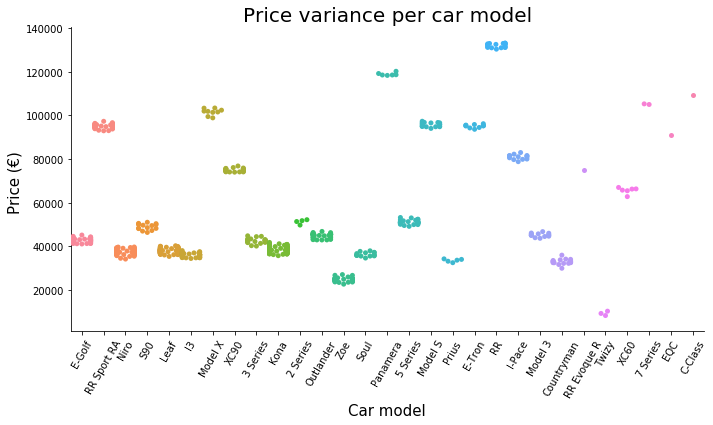

In [9]:
# Use seaborn.catplot() function to plot price per car model of the simulated data
sns.catplot(x="Model", y="Price (€)", data=Cars, kind='swarm', height=5, aspect=2)
plt.rcParams['figure.figsize'] = (14,6)
# Add a title and label axes
plt.title('Price variance per car model', size = 20)
plt.xlabel('Car model', size = 15)
plt.ylabel('Price (€) ', size = 15)
# Rotate the x axis text (stackoverflow, 2019)
plt.xticks(rotation=60)

## 3. Append dataset with column for Month of registeration

As can be seen in summary plot at the top of the notebook, the sales figures are not spread uniformly across the year, rather they have two distinct peaks in January and July. In the remainder months the number registered fall off. The probabilities in p2 are an accurate estimate of the monthly numbers, based on the summary sales figures in the Irish Motor Industry data provided. (Irish Motor Industry, 2019)

In [10]:
# Probabilities of what month the car was registered
p2=[0.23, 0.11, 0.1, 0.1, 0.06, 0.03, 0.19, 0.06, 0.03, 0.06, 0.03, 0]

In [11]:
# Add a column to the dataset to simulate the monthly numbers of cars registered
Cars['Month'] = np.random.choice(month, size=1000, p=p2)

In [12]:
# Confirm new column
Cars.head(10)

,Model,Make,Classification,Technology,Price (€),Range (km),Month
0,E-Golf,Volkswagen,Medium,Electric,43172.0,304,July
1,RR Sport RA,Land Rover,SUV,Hybrid,93025.0,40,June
2,Niro,Kia,SUV,Electric,38418.0,455,February
3,S90,Volvo,SUV,Hybrid,49997.0,40,February
4,Leaf,Nissan,Small,Electric,37150.0,385,May
5,Leaf,Nissan,Small,Electric,36875.0,385,October
6,I3,BMW,Small,Electric,37209.0,260,January
7,Model X,Tesla,SUV,Electric,101573.0,507,February
8,Leaf,Nissan,Small,Electric,39641.0,385,February
9,Niro,Kia,SUV,Electric,36537.0,455,March


To confirm that the simulated dats is accurate, the below plot displays the trend of total car sales per month from the simulated data. Please compare the trends of the below simulated plot with that image of the summar real data provided.

Text(0, 0.5, 'Number of cars')

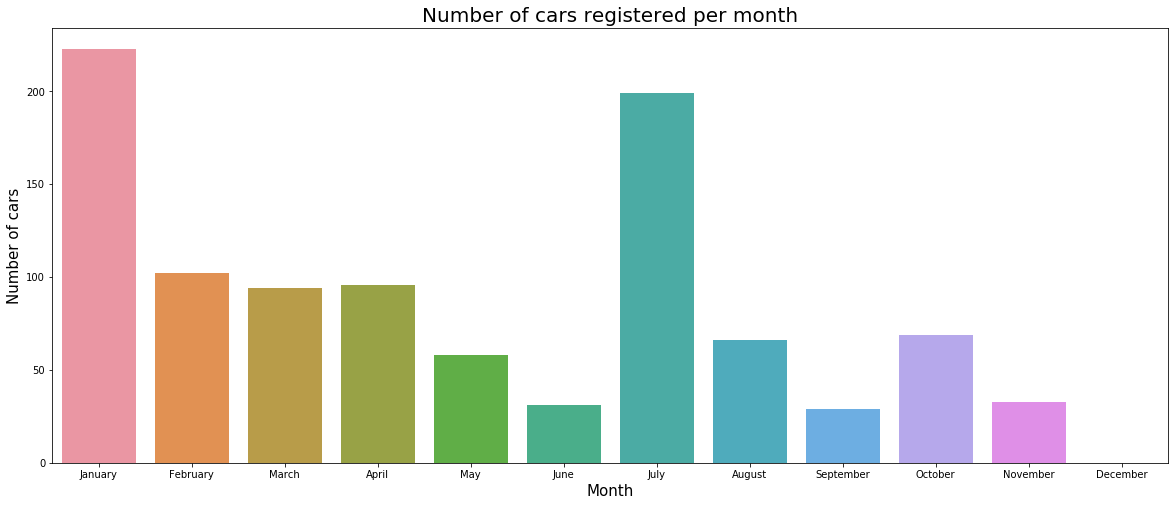

In [13]:
# Resize the output figure to be in line with the image below it
plt.rcParams['figure.figsize'] = (20,8)
# Plot the results of the simulation using the seaborn countplot function (Pydata, 2019)
sns.countplot(x='Month', data=Cars, order=month)
# Add a title and label axes
plt.title('Number of cars registered per month', size = 20)
plt.xlabel('Month', size = 15)
plt.ylabel('Number of cars', size = 15)

![New E-car sales summary](Images/E-Car-sales-summary.PNG)

## 4. Append dataset with column for county of Registration

For commuting purposes, the author is interested in viewing the sales figures and trends for Dublin and the surrounding counties to see whether certain cars are preferred as the commuting distance varies. The location of sales is random, but with probability weights attached in line with the summary statistics p3, and appended to the dataset. Once again, the most appropriate random function to use for this data simulation is numpy.random.choice() function.

In [14]:
# Probabilities of location where car is registered
p3=[0.728, 0.057, 0.033, 0.076, 0.057, 0.034, 0.015]

In [15]:
# Add a new column to the dataset to simulate what county the car was rgistered. Use the probabilities defined in p2 above
Cars['Location'] = np.random.choice(location, size=1000, p=p3)

In [16]:
# Confirm new column
Cars.head(10)

,Model,Make,Classification,Technology,Price (€),Range (km),Month,Location
0,E-Golf,Volkswagen,Medium,Electric,43172.0,304,July,Wexford
1,RR Sport RA,Land Rover,SUV,Hybrid,93025.0,40,June,Louth
2,Niro,Kia,SUV,Electric,38418.0,455,February,Dublin
3,S90,Volvo,SUV,Hybrid,49997.0,40,February,Dublin
4,Leaf,Nissan,Small,Electric,37150.0,385,May,Meath
5,Leaf,Nissan,Small,Electric,36875.0,385,October,Dublin
6,I3,BMW,Small,Electric,37209.0,260,January,Dublin
7,Model X,Tesla,SUV,Electric,101573.0,507,February,Wicklow
8,Leaf,Nissan,Small,Electric,39641.0,385,February,Dublin
9,Niro,Kia,SUV,Electric,36537.0,455,March,Dublin


## 5. Append dataset with column for colour of car

Based on the summary data provided by the Irish Motor Industry (Irish Motor Industry, 2019), certain colours were favoured more than others.<br>
![Cars by colour](Images/Cars-by-colour.PNG)<br>
The principal colours chosen are defined in colour = ['Grey', 'White', 'Black', 'Blue', 'Red', 'Other'] with the below probabilities, p4.

In [17]:
# Probabilities of colour of car
p4=[0.33, 0.21, 0.17, 0.15, 0.11, 0.03]

In [18]:
# Add a new column to the dataset to simulate  the chosen colour of car, with probabilities from defined in p4 above
Cars['Colour'] = np.random.choice(colour, size=1000, p=p4)

In [19]:
# Confirm new column
Cars.head(10)

,Model,Make,Classification,Technology,Price (€),Range (km),Month,Location,Colour
0,E-Golf,Volkswagen,Medium,Electric,43172.0,304,July,Wexford,Other
1,RR Sport RA,Land Rover,SUV,Hybrid,93025.0,40,June,Louth,Black
2,Niro,Kia,SUV,Electric,38418.0,455,February,Dublin,White
3,S90,Volvo,SUV,Hybrid,49997.0,40,February,Dublin,Red
4,Leaf,Nissan,Small,Electric,37150.0,385,May,Meath,White
5,Leaf,Nissan,Small,Electric,36875.0,385,October,Dublin,Black
6,I3,BMW,Small,Electric,37209.0,260,January,Dublin,Grey
7,Model X,Tesla,SUV,Electric,101573.0,507,February,Wicklow,Black
8,Leaf,Nissan,Small,Electric,39641.0,385,February,Dublin,Grey
9,Niro,Kia,SUV,Electric,36537.0,455,March,Dublin,Grey


Text(0, 0.5, 'Number of cars')

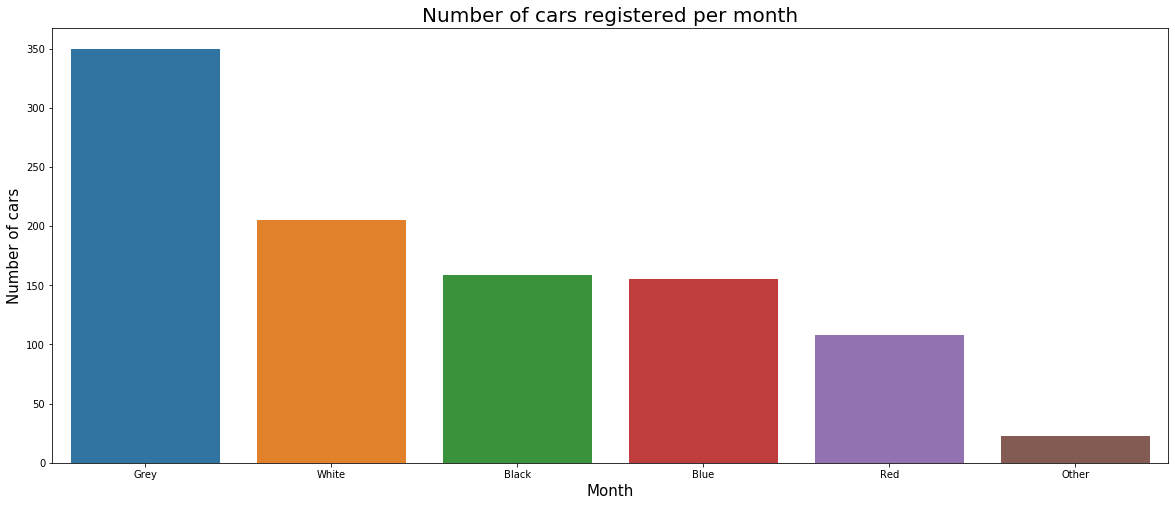

In [20]:
# Plot the results of the simulation using the seaborn countplot function (Pydata, 2019)
# Arrange the counts in descending order (stackoverflow, 2019)
sns.countplot(x='Colour', data=Cars, order=Cars['Colour'].value_counts().index)
# Add a title and label axes
plt.title('Number of cars registered per month', size = 20)
plt.xlabel('Month', size = 15)
plt.ylabel('Number of cars', size = 15)

## 6. Append dataset with column for Price per Month

It would be desirable to simulate data for cost of repayments per month of each car.  There are various forms of financing used for cars. For the purpose of this exercise, a bank loan is the option for which to simulate data from. Car loans are known as amortising loans ie. a loan with scheduled periodic payments that are applied to both principal and interest. An amortized loan payment first pays off the relevant interest expense for the period, after which the remainder of the payment reduces the principal (investopedia, 2019). To calculate the rate per month of an amortising loan, the formula below is used (The Balance, 2019).

$$ Loan Payment = Price / Discount Factor $$

where $$ Discount Factor = ((1 + x)^n - 1)/x(1 + x)^n $$<br>
x = Periodic Interest Rate ie. Annual rate divided by number of payment periods, expressed in decimal form<br>
n = Number of Periodic Payments ie. Payments per year times number of years

For this particular dataset, a pay back period of 7 years (ie 84 monthly payments) for every car purchase is to be assumed. Also, from research, car loan rates varied significantly over the course of 2019 (Moneyguideireland, 2019), even with institutions. A typical car loan rate varied between 7% and 14% APR. In simulating this, a uniform distribution will be applied across the 7 - 14% range to best simulate the varying interest rates over the year. This randomly generated rate will then be expressed in decimal form for a monthly rate.

In [21]:
for i in range(1000):
        n = 84 # = 12 months * 7 years
        x = (np.random.uniform(7, 14)/100)/12 # = random value between 7% and 14%, expresses in decimal form(/100) and
                                              # and monthly (/12)
        D = (((1 + x)**n) - 1)/(x*((1 + x)**n))
        Cars.loc[i, 'Price per month (€)'] =  round(Cars.loc[i, 'Price (€)']/D)

In [22]:
# Confirm new column
Cars.head(10)

,Model,Make,Classification,Technology,Price (€),Range (km),Month,Location,Colour,Price per month (€)
0,E-Golf,Volkswagen,Medium,Electric,43172.0,304,July,Wexford,Other,732.0
1,RR Sport RA,Land Rover,SUV,Hybrid,93025.0,40,June,Louth,Black,1681.0
2,Niro,Kia,SUV,Electric,38418.0,455,February,Dublin,White,665.0
3,S90,Volvo,SUV,Hybrid,49997.0,40,February,Dublin,Red,764.0
4,Leaf,Nissan,Small,Electric,37150.0,385,May,Meath,White,572.0
5,Leaf,Nissan,Small,Electric,36875.0,385,October,Dublin,Black,668.0
6,I3,BMW,Small,Electric,37209.0,260,January,Dublin,Grey,571.0
7,Model X,Tesla,SUV,Electric,101573.0,507,February,Wicklow,Black,1666.0
8,Leaf,Nissan,Small,Electric,39641.0,385,February,Dublin,Grey,607.0
9,Niro,Kia,SUV,Electric,36537.0,455,March,Dublin,Grey,633.0


As a sanity check on the above simulated data, it is a good idea to quicky test the data. Below, the dataset is filtered to list only the purchase Nissan Leaf's that were simulated, and the Price per month is compared. This can be used as both a check that the above mathematics is correct, but also as an indicator how much the price per month can vary depending on the price and interest rate variations.

In [23]:
Leaf = Cars.loc[Cars['Model'] == 'Leaf']
Leaf.head(10)

,Model,Make,Classification,Technology,Price (€),Range (km),Month,Location,Colour,Price per month (€)
4,Leaf,Nissan,Small,Electric,37150.0,385,May,Meath,White,572.0
5,Leaf,Nissan,Small,Electric,36875.0,385,October,Dublin,Black,668.0
8,Leaf,Nissan,Small,Electric,39641.0,385,February,Dublin,Grey,607.0
10,Leaf,Nissan,Small,Electric,37782.0,385,May,Dublin,Black,638.0
11,Leaf,Nissan,Small,Electric,37583.0,385,January,Dublin,Other,634.0
14,Leaf,Nissan,Small,Electric,37747.0,385,February,Dublin,Blue,594.0
23,Leaf,Nissan,Small,Electric,36994.0,385,January,Wexford,Red,659.0
27,Leaf,Nissan,Small,Electric,37407.0,385,July,Meath,Grey,694.0
33,Leaf,Nissan,Small,Electric,39061.0,385,September,Dublin,Other,711.0
45,Leaf,Nissan,Small,Electric,37485.0,385,February,Dublin,White,616.0


## 7. Call full dataset

Finally, a full dataset is called to show the simulated dataset

In [24]:
# Call full dataset
Cars

,Model,Make,Classification,Technology,Price (€),Range (km),Month,Location,Colour,Price per month (€)
0,E-Golf,Volkswagen,Medium,Electric,43172.0,304,July,Wexford,Other,732.0
1,RR Sport RA,Land Rover,SUV,Hybrid,93025.0,40,June,Louth,Black,1681.0
2,Niro,Kia,SUV,Electric,38418.0,455,February,Dublin,White,665.0
3,S90,Volvo,SUV,Hybrid,49997.0,40,February,Dublin,Red,764.0
4,Leaf,Nissan,Small,Electric,37150.0,385,May,Meath,White,572.0
5,Leaf,Nissan,Small,Electric,36875.0,385,October,Dublin,Black,668.0
6,I3,BMW,Small,Electric,37209.0,260,January,Dublin,Grey,571.0
7,Model X,Tesla,SUV,Electric,101573.0,507,February,Wicklow,Black,1666.0
8,Leaf,Nissan,Small,Electric,39641.0,385,February,Dublin,Grey,607.0
9,Niro,Kia,SUV,Electric,36537.0,455,March,Dublin,Grey,633.0


## References
1. Dreamstime.com, 2019, [Online image]. Available from: https://www.dreamstime.com/stock-photos-red-new-car-sign-image4256123 [viewed 29th Nov 2019]
2. Irish Motor Industry, 2019. *statsbeepbeep.ie* [Online]. Available from: https: https://stats.beepbeep.ie/ [viewed 1st Dec 2019]<br>
3. SciPy.org, 2019. *SciPy.org* [Online]. Available from: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html. [viewed, 4th Dec 2019]<br>
4. Stackoverflow, 2015. *stackoverflow.com* [Online]. Available from: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib [viewed 7th Dec 2019]
5. Pydata.org, 2019. *seaborn.pydata.org* [Online]. Available from: https://seaborn.pydata.org/generated/seaborn.countplot.html. [Viewed 7th Dec 2019] <br> 
6. Stackoverflow, 2019. *stackoverflow.com* [Online]. Available from: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count [viewed 8th Dec 2019)
7. Stackoverflow, 2019. *stackoverflow.com*. Available from: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib [viewed 7th Dec 2019]
8. Stackoverflow.com, 2017. *np-random-choice-probabilities-do-not-sum-to-1* [Online]. Avaiable from: https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1 [ viewed 4th Dec 2019]<br>
9. Carzone, 2019, *carzone.ie* [Online]. Available from: https://www.carzone.ie/new-cars/ [viewed 1st Dec 2019]
10. Hedges Company, 2019. *New car buyers demographics 2019* [Online]. Available from: https://hedgescompany.com/blog/2019/01/new-car-buyer-demographics-2019/ [viewed 5th Dec 2019]
11. Nissan, 2019. *Nissan.ie* [Online]. Available from: https://www.nissan.ie [viewed 30th Nov 2019]
12. Hyundai, 2019. *Hyundai.ie* [Online]. Available from: https://www.hyundai.ie/home/ [viewed 30th Nov 2019]
13. Kia, 2019. *Kia.ie* [Online]. Available from: https://www.kia.com/ie/ [viewed 30th Nov 2019]
14. Renault, 2019. *Renault.ie* [Online]. Available from: https://www.renault.ie/ [viewed 30th Nov 2019]
15. Volkswagen, 2019. *Volkswagen.ie* [Online]. Available from: https://www.volkswagen.ie/ [viewed 1st Dec 2019]
16. Mitsibishi, 2019. *Mitsubishi-motors.ie* [Online]. Available from: https://mitsubishi-motors.ie/ [viewed 1st Dec 2019]
17. Land Rover, 2019. *Land Rover.ie* [Online]. Available from: https://www.landrover.ie/ [viewed 1st Dec 2019]
18. BMW, 2019. *BMW.ie* [Online]. Available from: https://www.bmw.ie/ [viewed 1st Dec 2019]
19. Volvo, 2019. *volvo.ie* [Online]. Available from: https://www.volvocars.com/ie [viewed 2nd Dec 2019]
20. Mini, 2019. *mini.ie* [Online]. Available from: https://www.mini.ie/ [viewed 2nd Dec 2019]
21. Tesla, 2019. *tesla.ie* [Online]. Available from: https://www.tesla.com/en_ie [viewed 2nd Dec 2019]
22. Audi, 2019. *audi.ie* [Online]. Available from: https://www.audi.ie/ [viewed 2nd Dec 2019]
23. Jaguar, 2019. *jaguar.ie* [Online]. Available from: https://www.jaguar.ie/ [viewed 2nd Dec 2019]
24. Toyota, 2019. *toyota.ie* [Online]. Available from: https://www.toyota.ie/ [viewed 3rd Dec 2019]
25. Porsche, 2019. *porsche.com* [Online]. Available from: https://www.porsche.com/uk/_ireland_/ [viewed 3rd Dec 2019]
26. Ford, 2019. *ford.ie* [Online]. Available from: https://www.ford.ie/ [viewed 3rd Dec 2019]
27. Mercedes-Benz, 2019. *msl.ie* [Online]. Available from: https://www.msl.ie/ [viewed 3rd Dec 2019]
28. Investpoedia, 2019. *investopedia.com*. [Online]. Available from: https://www.investopedia.com/terms/a/amortized_loan.asp [viewed 15th Dec 2019]
29. The Balance, 2019. *thebalance.com* [Online]. Available from: https://www.thebalance.com/loan-payment-calculations-315564 [viewed 12th Dec 2019]
30. Moneyguideireland, 2019. *moneyguideireland.com* [Online]. Available from: https://www.moneyguideireland.com/loans [viewed 15th Dec 2019]